In [18]:
# Time Series Prediction with LSTM
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from pickle import dump

In [19]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
  a = dataset[i:(i+look_back), 0]
  dataX.append(a)
  dataY.append(dataset[i + look_back, 0])
 return numpy.array(dataX), numpy.array(dataY)

In [20]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [21]:
dataset_name = "q1"
product_name = "o3"
file_path = 'dataset/'+dataset_name+'.csv'
dataframe = pd.read_csv(file_path)
print("Dataframe: \n", dataframe)
dataset = numpy.asarray(dataframe[product_name]*1000000).reshape(-1,1)
print("Dataset: \n", dataset)


Dataframe: 
             date dist        co       no2        o3  so2  ch4      hcho
0     2018-04-30   q1  0.036519  0.000059  0.127509  0.0    0  0.000000
1     2018-05-01   q1  0.035765  0.000053  0.128756  0.0    0  0.000000
2     2018-05-02   q1  0.037218  0.000051  0.127053  0.0    0  0.000000
3     2018-05-03   q1  0.000000  0.000000  0.120879  0.0    0  0.000000
4     2018-05-04   q1  0.000000  0.000000  0.121712  0.0    0  0.000000
...          ...  ...       ...       ...       ...  ...  ...       ...
1194  2021-08-06   q1  0.000000  0.000000  0.120559  0.0    0  0.000000
1195  2021-08-07   q1  0.020865  0.000000  0.119257  0.0    0  0.000000
1196  2021-08-08   q1  0.025278  0.000000  0.118261  0.0    0  0.000000
1197  2021-08-09   q1  0.000000  0.000000  0.120582  0.0    0  0.000295
1198  2021-08-10   q1  0.026092  0.000000  0.120392  0.0    0  0.000000

[1199 rows x 8 columns]
Dataset: 
 [[127509.32574272]
 [128756.40392303]
 [127053.02238464]
 ...
 [118261.28512621]
 [1205

In [22]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print("Dataset after scale: \n", dataset)

Dataset after scale: 
 [[0.97968032]
 [0.98926188]
 [0.97617445]
 ...
 [0.90862573]
 [0.92645396]
 [0.92499715]]


In [23]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [24]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print("TrainX shape: ", trainX.shape)
print("TrainY shape: ", trainY.shape)
print(trainX)
print(trainY)

TrainX shape:  (957, 1)
TrainY shape:  (957,)
[[0.97968032]
 [0.98926188]
 [0.97617445]
 [0.92873543]
 [0.93513461]
 [0.92474258]
 [0.92306012]
 [0.91443826]
 [0.94077535]
 [0.94754031]
 [0.98286654]
 [0.99595603]
 [0.99051393]
 [0.92919402]
 [0.96313533]
 [0.97921332]
 [0.97294117]
 [0.97994479]
 [0.98126599]
 [0.97253199]
 [0.96300882]
 [0.99716434]
 [0.95778327]
 [0.97876647]
 [0.94414292]
 [0.95809405]
 [0.97490145]
 [0.94873226]
 [0.98922043]
 [0.96354967]
 [0.97234743]
 [0.98480632]
 [0.97356685]
 [0.93711022]
 [0.92225194]
 [0.92180841]
 [0.93436083]
 [0.93421778]
 [0.93952038]
 [0.92323694]
 [0.91395792]
 [0.92262546]
 [0.        ]
 [0.91240156]
 [0.91082729]
 [0.        ]
 [0.        ]
 [0.92483687]
 [0.91318673]
 [0.94050178]
 [0.93175318]
 [0.92934972]
 [0.94599558]
 [0.95732892]
 [0.94371296]
 [0.95687572]
 [0.94241729]
 [0.97020581]
 [0.94017468]
 [0.92880355]
 [0.94842251]
 [0.92010402]
 [0.93015429]
 [0.92317186]
 [0.92504312]
 [0.93452885]
 [0.92343552]
 [0.92645802]
 [

In [25]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [26]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(128, input_shape=(1, look_back), return_sequences=True))
model.add(LSTM(128, input_shape=(1, look_back)))
#model.add(Dense(256))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2,
          validation_data=(testX, testY))

score = model.evaluate(testX, testY, verbose=0)
print('score: test score = ', score)

# save the model
model.save('models/rnn-lstm-'+product_name)
# save the scaler
dump(scaler, open('models/rnn-lstm-'+product_name+'/scaler.pkl', 'wb'))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 128)            66560     
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
957/957 - 8s - loss: 0.0266 - accuracy: 0.0021 - val_loss: 0.0185 - val_accuracy: 0.0000e+00
Epoch 2/100
957/957 - 3s - loss: 0.0126 - accuracy: 0.0010 - val_loss: 0.0170 - val_accuracy: 0.0000e+00
Epoch 3/100
957/957 - 3s - loss: 0.0124 - accuracy: 0.0010 - val_loss: 0.0203 - val_accuracy: 0.0000e+00
Epoch 4/100
957/957 - 3s - loss: 0.0125 - accuracy: 0.0010

INFO:tensorflow:Assets written to: models/rnn-lstm-o3/assets


INFO:tensorflow:Assets written to: models/rnn-lstm-o3/assets


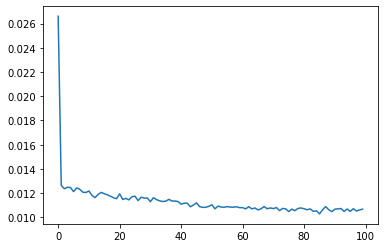

In [27]:
plt.plot(history.history['loss'])

In [28]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [29]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

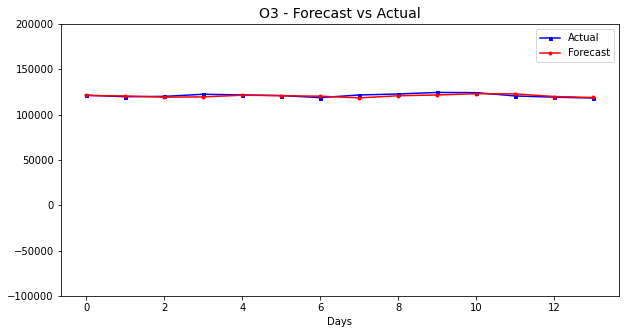

In [35]:
test_Y = testY[0][len(testY[0])-15:len(testY[0])-1]
test_Ypred = testPredict[len(testPredict)-15:len(testPredict)-1]
plt.subplots(figsize=(10, 5))
plt.title(product_name.upper() + " - Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(numpy.ravel(test_Y)), "bs-", markersize=3, label="Actual")
plt.plot(pd.Series(numpy.ravel(test_Ypred)), "ro-", markersize=3, label="Forecast")
plt.legend(loc="best")
plt.xlabel("Days")
plt.ylim([0,300000])
plt.show()

In [31]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.8f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.8f RMSE' % (testScore))

Train Score: 13099.26005693 RMSE
Test Score: 15355.53034622 RMSE


In [32]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [33]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [34]:
# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset),"b-", label="Actual")
# plt.plot(trainPredictPlot,"y-", label="Train pred")
# plt.plot(scaler.inverse_transform(testY)[0],"b-", label="Actual")
# plt.plot(testPredictPlot, "g-", label="Test pred")
# plt.legend(loc="best")
# plt.show()
